In [ ]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

ERROR! Session/line number was not unique in database. History logging moved to new session 341


In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from subprocess import check_output
%matplotlib inline

In [2]:
df = pd.read_pickle('quora.pkl')

In [3]:
df.shape

(404290, 6)

In [4]:
df.head()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 404290 entries, 0 to 404289
Data columns (total 6 columns):
id              404290 non-null int64
qid1            404290 non-null int64
qid2            404290 non-null int64
question1       404289 non-null object
question2       404288 non-null object
is_duplicate    404290 non-null int64
dtypes: int64(4), object(2)
memory usage: 15.4+ MB


<h2>Exploring and generating Insight

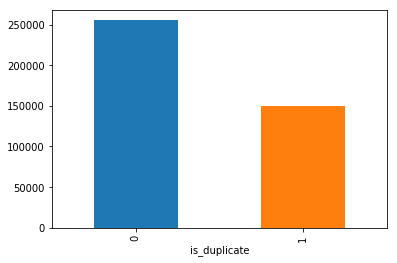

In [5]:
df.groupby('is_duplicate')['id'].count().plot.bar()

In [6]:
print('Total number of question pairs for training:{}'.format(len(df)))

Total number of question pairs for training:404290


In [7]:
print('Question pairs are not Similar ("0"): {}%'.format(100 - round(df['is_duplicate'].mean()*100, 2)))
print('Question pairs are Similar ("1"): {}% '.format(round(df['is_duplicate'].mean()*100, 2)))

Question pairs are not Similar ("0"): 63.08%
Question pairs are Similar ("1"): 36.92% 


In [8]:
qids = pd.Series(df['qid1'].tolist() + df['qid2'].tolist())

In [9]:
print ("Total num of Questions are: {} ".format(len(qids)))

print ('Total num of  Unique Questions are: {} '.format(len(np.unique(qids))))

print ('Total num of Multiple Occuring Questions are: {} '.format(len(qids) - len(np.unique(qids))))

print ('Multiple occured questions in qid1:  {} '.format(len(df[df.duplicated('question1')])))

print ('Multiple occured questions in qid2:  {} '.format(len(df[df.duplicated('question2')])))

print ('Multiple occured questions in both qid1 aqnd qid2:{} '.format(len(df[df.duplicated('qid1') & df.duplicated('qid2')])))

print ('Number of unique questions that appear multiple times: {} '.format(np.sum(qids.value_counts() > 1)))

print ('Max num of time a single question is repeated: {} '.format(max(qids.value_counts()))) 

q_vals=qids.value_counts()

q_vals=q_vals.values

Total num of Questions are: 808580 
Total num of  Unique Questions are: 537933 
Total num of Multiple Occuring Questions are: 270647 
Multiple occured questions in qid1:  113833 
Multiple occured questions in qid2:  105115 
Multiple occured questions in both qid1 aqnd qid2:61325 
Number of unique questions that appear multiple times: 111780 
Max num of time a single question is repeated: 157 


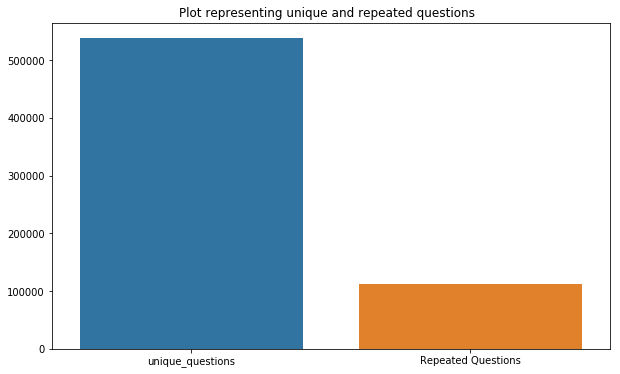

<Figure size 432x288 with 0 Axes>

In [10]:
x = ["unique_questions" , "Repeated Questions"]
y = [537933, 111780]

plt.figure(figsize=(10, 6))
plt.title ("Plot representing unique and repeated questions  ")
sns.barplot(x ,y)
plt.show()
plt.savefig('rep_que_bar.png')

Max num of time a single question is repeated: 157 


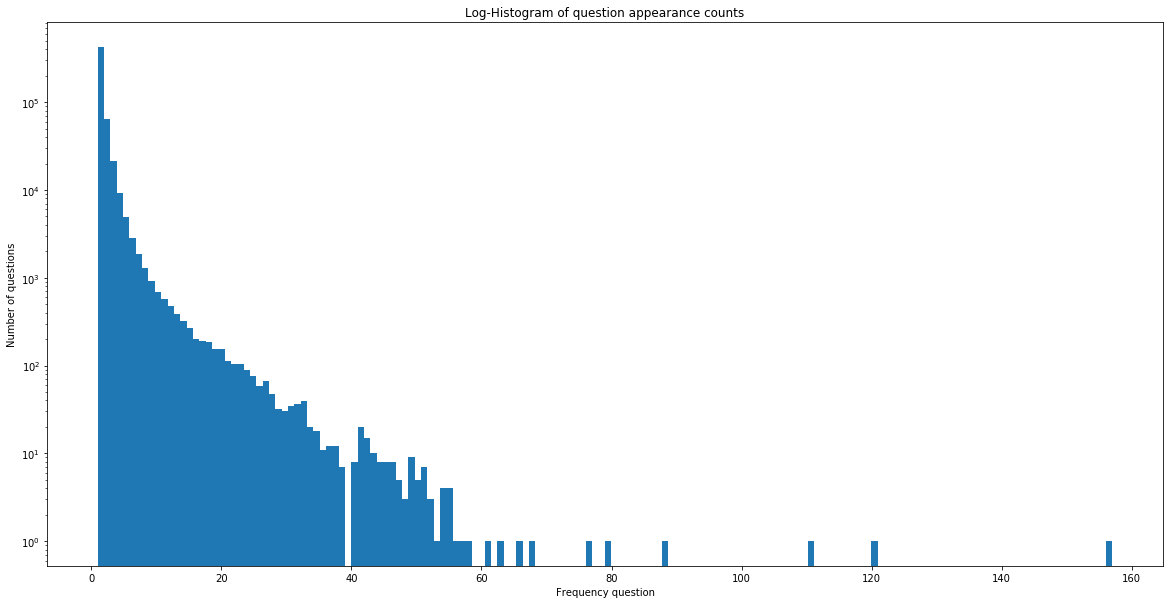

In [11]:
plt.figure(figsize=(20, 10))

plt.hist(qids.value_counts(), bins=160)

plt.yscale('log', nonposy='clip')

plt.title('Log-Histogram of question appearance counts')

plt.xlabel('Frequency question')

plt.ylabel('Number of questions')

print ('Max num of time a single question is repeated: {} '.format(max(qids.value_counts())))
plt.savefig('freq_hist.png')

In [12]:
#Checking whether there are any rows with null values
print(df[df.isnull().any(1)])

            id    qid1    qid2                         question1  \
105780  105780  174363  174364    How can I develop android app?   
201841  201841  303951  174364  How can I create an Android app?   
363362  363362  493340  493341                               NaN   

                                                question2  is_duplicate  
105780                                                NaN             0  
201841                                                NaN             0  
363362  My Chinese name is Haichao Yu. What English na...             0  


</h3>Two (and two nan) are repeated

In [13]:
# Filling the null values with ' '
df = df.fillna('')

nan_rows = df[df.isnull().any(1)]
print (nan_rows)

Empty DataFrame
Columns: [id, qid1, qid2, question1, question2, is_duplicate]
Index: []


<h1>Feature Extraction and EDA

In [14]:
df['freq_qid1'] = df.groupby('qid1')['qid1'].transform('count') 
print ("freq_qid1 = frequency of qid1's")

df['freq_qid2'] = df.groupby('qid2')['qid2'].transform('count')
print ("freq_qid2 = frequency of qid2's ")

df['q1len'] = df['question1'].str.len() 
print ("q1len = Length of q1")

df['q2len'] = df['question2'].str.len()
print ("q2len = Length of q2")

df['q1_n_words'] = df['question1'].apply(lambda row: len(row.split(" ")))
print ("q1_n_words = num of words i Question 1")

# how lambda is workiing
df['q2_n_words'] = df['question2'].apply(lambda row: len(row.split(" ")))
print ("q2_n_words = num of words i Question 2")

def normalized_word_Common(row):
    w1 = set(map(lambda word: word.lower().strip(), row['question1'].split(" ")))
    w2 = set(map(lambda word: word.lower().strip(), row['question2'].split(" ")))    
    return 1.0 * len(w1 & w2)

df['word_Common'] = df.apply(normalized_word_Common, axis=1)
print ("word_Common = (num of common unique words in Question 1 and Question 2)")

def normalized_word_Total(row):
    w1 = set(map(lambda word: word.lower().strip(), row['question1'].split(" ")))
    w2 = set(map(lambda word: word.lower().strip(), row['question2'].split(" ")))    
    return 1.0 * (len(w1) + len(w2))

df['word_Total'] = df.apply(normalized_word_Total, axis=1)
print ("word_Total =(Total num of words in Question 1 + Total num of words in Question 2)")

def normalized_word_share(row):
    w1 = set(map(lambda word: word.lower().strip(), row['question1'].split(" ")))
    w2 = set(map(lambda word: word.lower().strip(), row['question2'].split(" ")))    
    return 1.0 * len(w1 & w2)/(len(w1) + len(w2))

df['word_share'] = df.apply(normalized_word_share, axis=1)
print ("word_share = (num of common unique words in Question 1 and Question 2)/(Total num of words in Question 1 + Total num of words in Question 2)\n")

print ("freq_q1+q2 = sum total of frequency of qid1 and qid2 ")

print ("freq_q1-q2 = absolute difference of frequency of qid1 and qid2 ")

df['freq_q1+q2'] = df['freq_qid1']+df['freq_qid2']
df['freq_q1-q2'] = abs(df['freq_qid1']-df['freq_qid2'])

freq_qid1 = frequency of qid1's
freq_qid2 = frequency of qid2's 
q1len = Length of q1
q2len = Length of q2
q1_n_words = num of words i Question 1
q2_n_words = num of words i Question 2
word_Common = (num of common unique words in Question 1 and Question 2)
word_Total =(Total num of words in Question 1 + Total num of words in Question 2)
word_share = (num of common unique words in Question 1 and Question 2)/(Total num of words in Question 1 + Total num of words in Question 2)

freq_q1+q2 = sum total of frequency of qid1 and qid2 
freq_q1-q2 = absolute difference of frequency of qid1 and qid2 


In [15]:
df.head()

,id,qid1,qid2,question1,question2,is_duplicate,freq_qid1,freq_qid2,q1len,q2len,q1_n_words,q2_n_words,word_Common,word_Total,word_share,freq_q1+q2,freq_q1-q2
0,0,1,2,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0,1,1,66,57,14,12,10.0,23.0,0.434783,2,0
1,1,3,4,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0,4,1,51,88,8,13,4.0,20.0,0.200000,5,3
2,2,5,6,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,0,1,1,73,59,14,10,4.0,24.0,0.166667,2,0
3,3,7,8,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...,0,1,1,50,65,11,9,0.0,19.0,0.000000,2,0
4,4,9,10,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?,0,3,1,76,39,13,7,2.0,20.0,0.100000,4,2


F:\Software\python\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


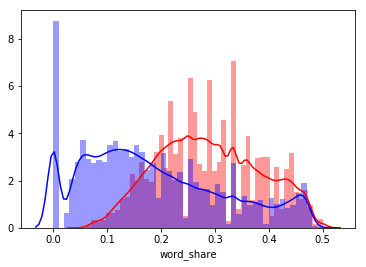

In [17]:
sns.distplot(df[df['is_duplicate'] == 1.0]['word_share'][0:] , label = "1", color = 'red')
sns.distplot(df[df['is_duplicate'] == 0.0]['word_share'][0:] , label = "0" , color = 'blue' )
plt.savefig('word_share.png')

<h>The average word share and Common no. of words of qid1 and qid2 is more when they are duplicate(Similar)

In [18]:
df.to_pickle('quora_preprocess.pkl')

F:\Software\python\lib\site-packages\seaborn\axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


<Figure size 864x576 with 0 Axes>

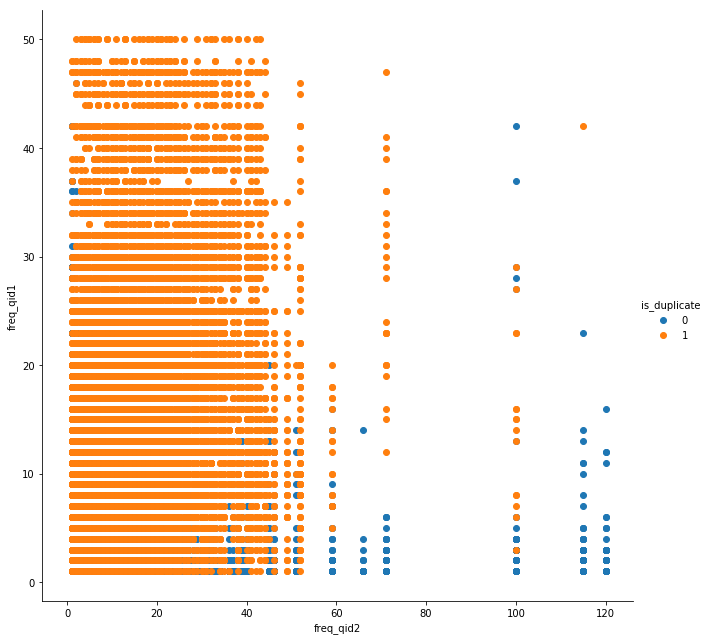

In [20]:
plt.figure(figsize=(12, 8))
sns.FacetGrid(df, hue="is_duplicate", size=9) \
   .map(plt.scatter, "freq_qid2", "freq_qid1") \
   .add_legend()
plt.savefig('facet_grid.png')

if the frequency of qid1 and qid2 > 15 (aprox) , then its a high chance that the questions are duplicates.